# **Video Preprocessing**

- **Frame Extraction**: Extract frames from the video to get a sequence of 2D images. You can use tools like OpenCV for this.
- **Image Enhancement**: Apply filters or image enhancement techniques to highlight the organ and reduce noise. Techniques like histogram equalization or contrast adjustments can improve visibility.

# Importing

In [1]:
#!pip install pygame


In [1]:
from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt
from IPython.display import Video
import cv2
import numpy as np

In [3]:
# Load the video file
video = VideoFileClip("Zygote Body 3D Anatomy Online Visualizer _ Human Anatomy 3D - Google Chrome 2024-11-12 22-05-13.mp4")

# Set the desired crop width and height
crop_width = 400
crop_height = 600

# Calculate the top-left corner of the crop box to center the crop
x1 = (video.w - crop_width) / 2  # Center horizontally
y1 = (video.h - crop_height) / 2  # Center vertically

# Crop the video
cropped_video = video.crop(x1=x1, y1=y1, width=crop_width, height=crop_height)

# Get a frame from the cropped video at a specific time (e.g., 1 second)
frame = cropped_video.get_frame(1)  # Time in seconds

# Display the frame using matplotlib
plt.imshow(frame)
plt.axis('off')  # Hide axis
plt.show()


OSError: MoviePy error: the file Zygote Body 3D Anatomy Online Visualizer _ Human Anatomy 3D - Google Chrome 2024-11-12 22-05-13.mp4 could not be found!
Please check that you entered the correct path.

In [ ]:
# Crop out the first two seconds

video_duration = cropped_video.duration
trimmed_video = cropped_video.subclip(2, video_duration-1)  # Start from 2 seconds to the end

In [ ]:
# preview the video
trimmed_video.preview()

In [ ]:
# Save or view the cropped video
#cropped_video.write_videofile("center_cropped_video.mp4")

: 

# Select Three frames From the Video

In [262]:
newvid = VideoFileClip('heart_video.mp4')

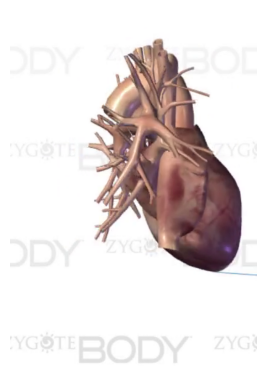

In [263]:
frame1 = newvid.get_frame(5)
plt.imshow(frame1)
plt.axis('off')  # Hide axis
plt.show()

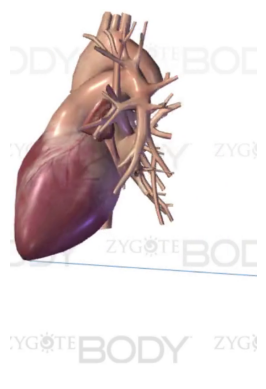

In [264]:
frame2 = newvid.get_frame(6)
plt.imshow(frame2)
plt.axis('off')  # Hide axis
plt.show()

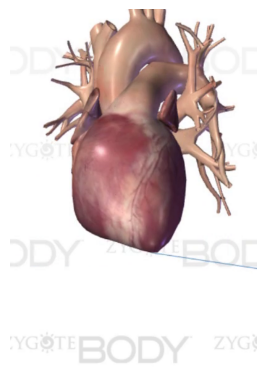

(600, 400, 3)


In [265]:
frame3 = newvid.get_frame(7)
plt.imshow(frame3)
plt.axis('off')  # Hide axis
plt.show()
print(frame3.shape)

# Make Grayscale

In [2]:
from PIL import Image

# Load the images
frame1 = np.array(Image.open('heart1.png'))
frame2 = np.array(Image.open('heart2.png'))
frame3 = np.array(Image.open('heart3.png'))

# Crop all frames to 530x430 (height x width)
frame1 = frame1[:530, :430]
frame2 = frame2[:530, :430]
frame3 = frame3[:530, :430]

frames = [frame1, frame2, frame3]

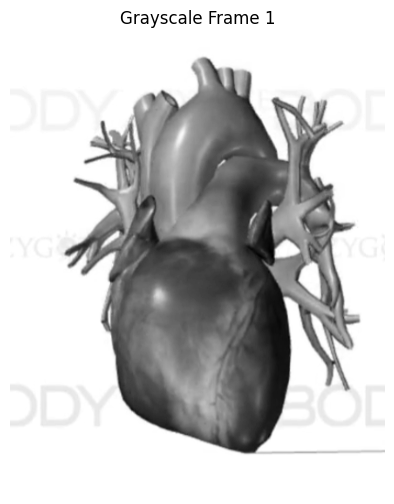

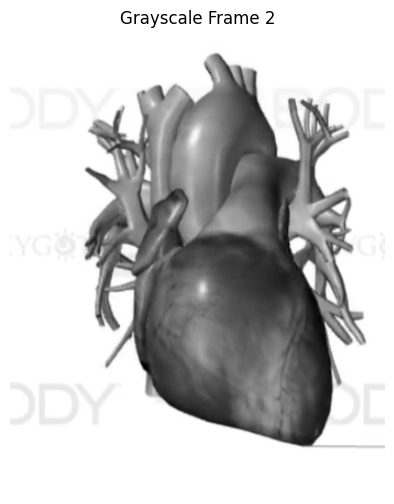

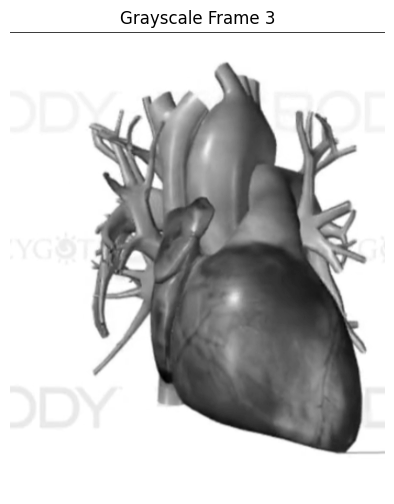

In [3]:


gray_frames = {}  # Dictionary to store the grayscale images

# Assuming 'frames' is a list of images
for idx, img in enumerate(frames):
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    
    # Store the grayscale image in the dictionary
    gray_frames[f"grayframe{idx + 1}"] = grayimg
    
    # Plot the grayscale image using matplotlib
    plt.figure(figsize=(6, 6))  # Set the size of the plot
    plt.imshow(grayimg, cmap='gray')  # Use 'gray' colormap for grayscale
    plt.title(f"Grayscale Frame {idx + 1}")  # Set the title of the plot
    plt.axis('off')  # Hide the axes
    plt.show()  # Display the plot


# Thresholding

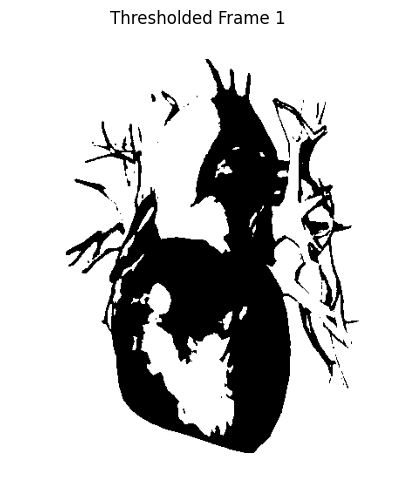

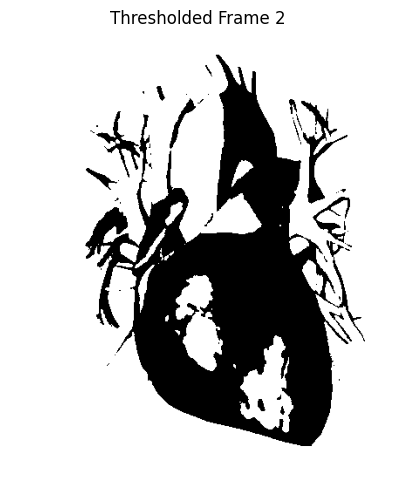

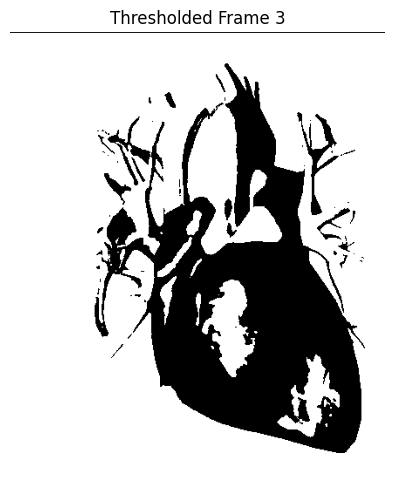

In [4]:

thresholded_frames = {}  # Dictionary to store thresholded images

# Assuming 'frames' is a list of images
for idx, img in enumerate(frames):
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    
    # Apply thresholding to the grayscale image
    _, thresholded_img = cv2.threshold(grayimg, 127, 255, cv2.THRESH_BINARY)  # Threshold at 127
    
    # Store the thresholded image in the dictionary
    thresholded_frames[f"thresholded_frame{idx + 1}"] = thresholded_img
    
    # Plot the thresholded image using matplotlib
    plt.figure(figsize=(6, 6))  # Set the size of the plot
    plt.imshow(thresholded_img, cmap='gray')  # Use 'gray' colormap for grayscale
    plt.title(f"Thresholded Frame {idx + 1}")  # Set the title of the plot
    plt.axis('off')  # Hide the axes
    plt.show()  # Display the plot


# Adjust Thresholding

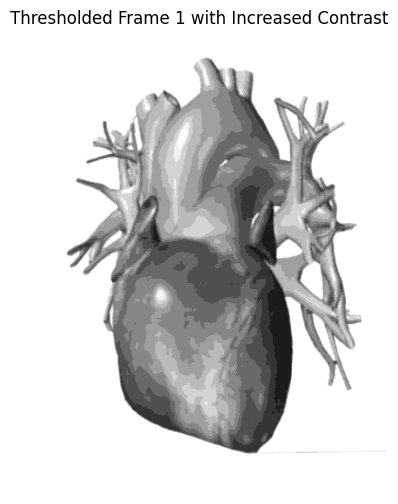

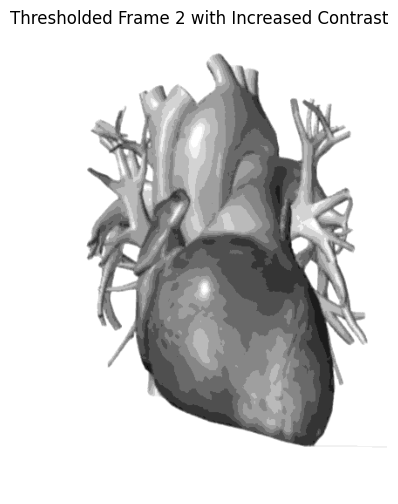

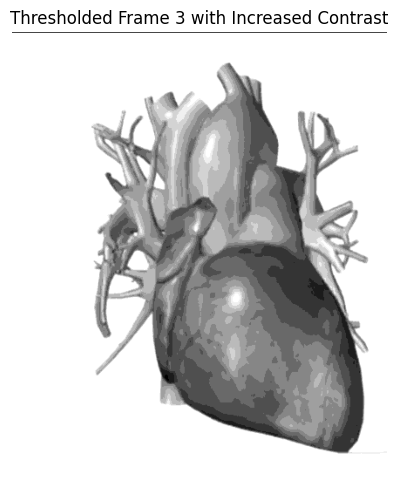

In [5]:
thresholded12_frames = {}  # Dictionary to store thresholded images

# Define the threshold values for 12 levels (adjust these values as needed)
threshold_values = [21, 43, 64, 85, 106, 128, 149, 170, 191, 213, 234]  # 12 levels: 0–21, 22–43, ..., 235–255

# Assuming 'frames' is a list of images
for idx, img in enumerate(frames):
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Apply multi-level thresholding (12 levels)
    thresholded_img = grayimg.copy()

    # Assign values for each threshold level
    for i in range(len(threshold_values)):
        lower_bound = 0 if i == 0 else threshold_values[i - 1]
        upper_bound = threshold_values[i]
        value = upper_bound
        thresholded_img[(grayimg > lower_bound) & (grayimg <= upper_bound)] = value

    # Set values above the last threshold to 255
    thresholded_img[(grayimg > threshold_values[-1])] = 255

    # Increase the contrast
    alpha = 1.13 # Contrast control (1.0 means no change, >1 increases contrast)
    beta = 0     # Brightness control (0 means no change)

    # Apply contrast stretching (increase contrast)
    contrast_img = cv2.convertScaleAbs(thresholded_img, alpha=alpha, beta=beta)

    # Store the contrast-adjusted image in the dictionary
    thresholded12_frames[f"thresholded_frame{idx + 1}"] = contrast_img

    # Plot the thresholded image with increased contrast using matplotlib
    plt.figure(figsize=(6, 6))  # Set the size of the plot
    plt.imshow(contrast_img, cmap='gray')  # Use 'gray' colormap for grayscale
    plt.title(f"Thresholded Frame {idx + 1} with Increased Contrast")  # Set the title of the plot
    plt.axis('off')  # Hide the axes
    plt.show()  # Display the plot


# Histogram Equalization

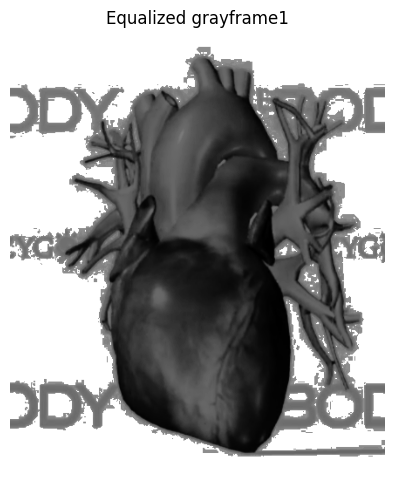

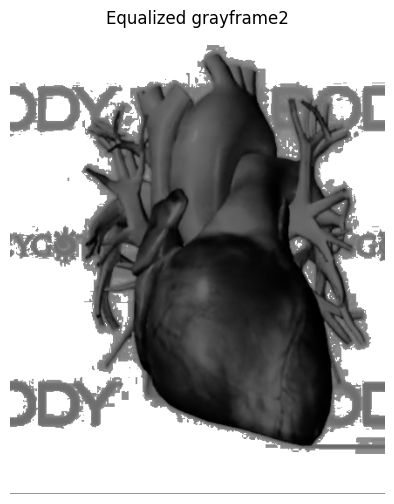

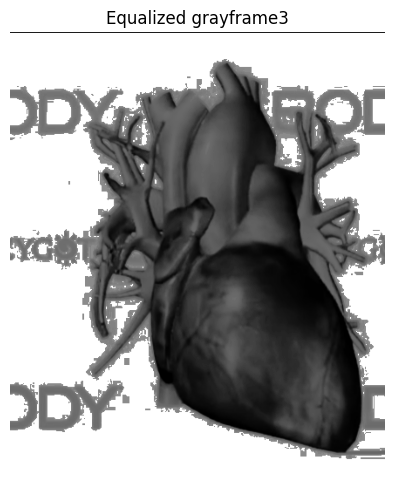

In [6]:
# Assuming 'gray_frames' is a dictionary containing grayscale images
equalized_frames = {}  # Dictionary to store equalized images

# Iterate through each grayscale image in the dictionary
for idx, grayimg in gray_frames.items():
    # Apply histogram equalization to the grayscale image
    equalized_img = cv2.equalizeHist(grayimg)
    
    # Store the equalized image in the dictionary
    equalized_frames[idx] = equalized_img
    
    # Plot the equalized image using matplotlib
    plt.figure(figsize=(6, 6))  # Set the size of the plot
    plt.imshow(equalized_img, cmap='gray')  # Use 'gray' colormap for grayscale
    plt.title(f"Equalized {idx}")  # Set the title of the plot
    plt.axis('off')  # Hide the axes
    plt.show()  # Display the plot


# Outline the Heart with Edge Detector

Here we are using Canny Edge Detector.

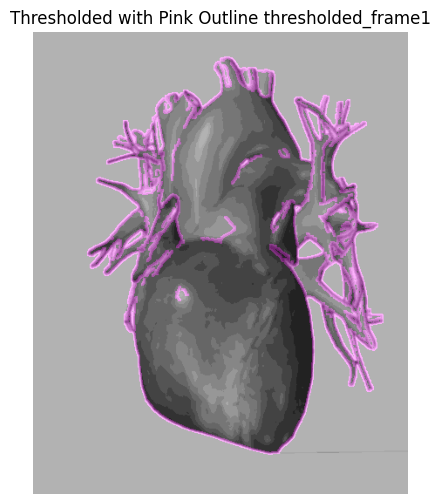

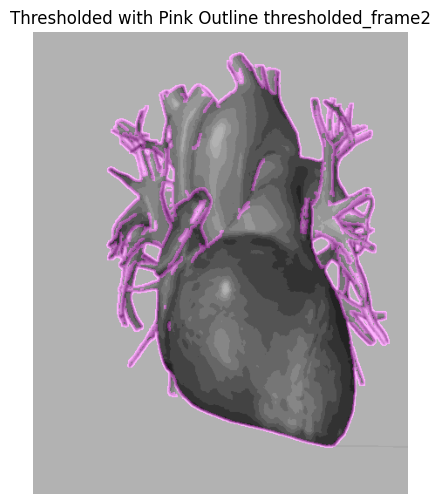

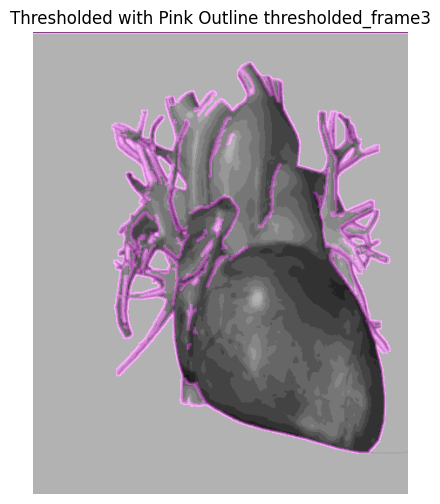

In [6]:
thresholded_frames_with_outline = {}  # Dictionary to store thresholded images with pink outlines
dilated_edge_dict = {} # dictionary to store dilated edges

# Assuming 'thresholded8_frames' is a dictionary where the keys are frame names and the values are image matrices
for name, img in thresholded12_frames.items():
    # Check if the image is in grayscale (single-channel)
    if len(img.shape) == 3:  # Check if it's a multi-channel image (e.g., RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if it's not already

    # Apply Canny edge detection
    edges = cv2.Canny(img, threshold1=100, threshold2=200)  # Adjust thresholds as needed

    # Dilate the edges
    kernel = np.ones((3, 3), np.uint8)  # Define the dilation kernel
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    # save dilated edges
    dilated_edge_dict[name] = dilated_edges
    
    # Create a 3-channel image for the edges and set all edge pixels to pink (BGR format: [255, 0, 255])
    edges_colored = cv2.cvtColor(dilated_edges, cv2.COLOR_GRAY2BGR)
    edges_colored[dilated_edges == 255] = [255, 0, 255]  # Set edges (255) to bright pink
    
    # Combine the original grayscale image with the pink edges outline
    outlined_img = cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR), 0.7, edges_colored, 0.3, 0)
    
    # Store the outlined image in the dictionary
    thresholded_frames_with_outline[name] = outlined_img
    
    # Plot the outlined image using matplotlib
    plt.figure(figsize=(6, 6))  # Set the size of the plot
    plt.imshow(cv2.cvtColor(outlined_img, cv2.COLOR_BGR2RGB))  # Convert to RGB for correct display
    plt.title(f"Thresholded with Pink Outline {name}")  # Set the title of the plot
    plt.axis('off')  # Hide the axes
    plt.show()  # Display the plot




In [7]:
print(edges[0].size)

430


# Find the contours of the edges

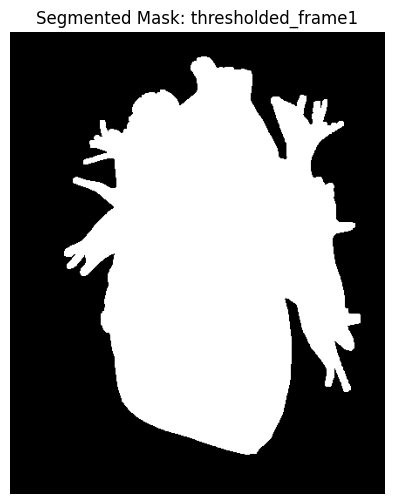

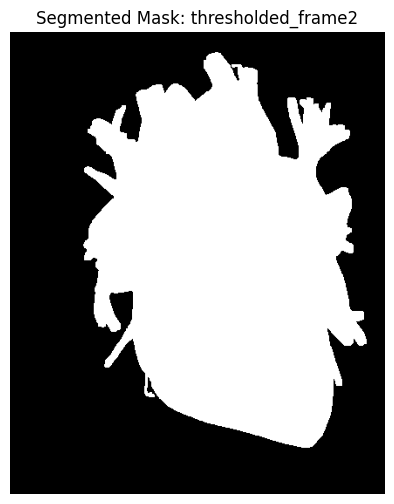

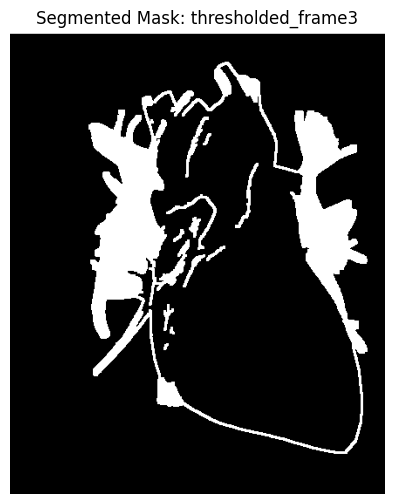

In [8]:
contour_dict = {}  # Dictionary to store contours and masks

# Assuming 'frame1' is the original frame, and 'dilated_edge_dict' contains edge-detected images
framesize = frame1.shape[:2]  # Get the height and width of the frame

for name, edges in dilated_edge_dict.items():
    # Find contours from the edge-detected image
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank mask for drawing the contours
    contour_mask = np.zeros(framesize, dtype=np.uint8)  # Ensure correct shape and type
    cv2.drawContours(contour_mask, contours, -1, 255, thickness=cv2.FILLED)

    # Store the mask in the dictionary
    contour_dict[name] = contour_mask

    # Display the segmented mask
    plt.figure(figsize=(6, 6))
    plt.imshow(contour_mask, cmap="gray")
    plt.title(f"Segmented Mask: {name}")
    plt.axis("off")
    plt.show()



# Segment the Region of Interest

Using the mask generated from the contours we can segment a region of interest

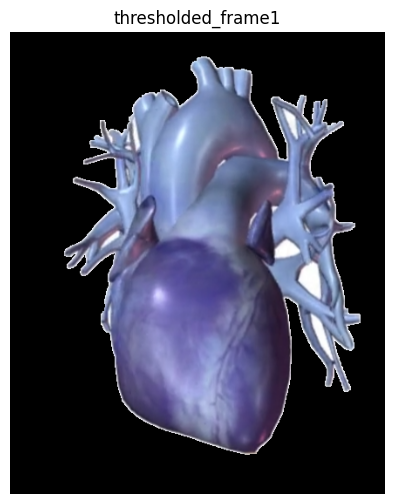

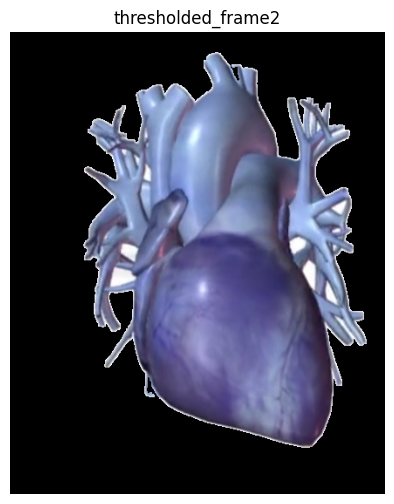

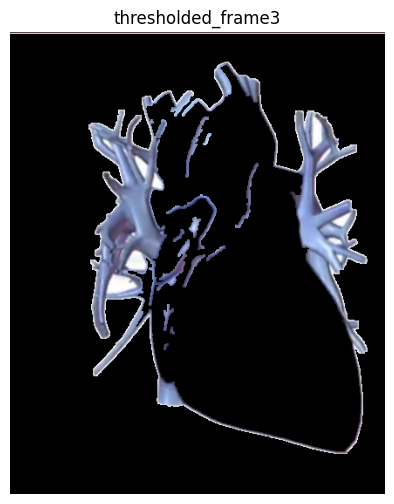

In [9]:
for name, frame in zip(contour_dict.keys(), frames):
    mask = contour_dict[name]

    # Apply the mask
    segmented_img = cv2.bitwise_and(frame, frame, mask=mask)

    # Plot the segmented region
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
    plt.title(name)
    plt.axis("off")
    plt.show()


# Fill Holes in image using Morphological Operations

In [25]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))  # Define a structuring element (adjust size as needed)

# Select the third frame and its corresponding contour mask
third_frame = frames[0]  # Index 2 corresponds to the third frame
third_contour_mask_name = list(contour_dict.keys())[0]  # Get the key for the third contour mask
third_contour_mask = contour_dict[third_contour_mask_name]

# Fill gaps in the mask using morphological closing
filled_mask = cv2.morphologyEx(third_contour_mask, cv2.MORPH_CLOSE, kernel)

# Display the filled mask
plt.figure(figsize=(6, 6))
plt.imshow(filled_mask, cmap="gray")
plt.title(f"Filled Mask: {third_contour_mask_name}")
plt.axis("off")
plt.show()

# Apply the filled mask to the original frame
final_segmented_image = cv2.bitwise_and(third_frame, third_frame, mask=filled_mask)

# Display the final segmented image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(final_segmented_image, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.title(f"Final Segmented Image: {third_contour_mask_name}")
plt.axis("off")
plt.show()

# save image
frame1 = final_segmented_image
cv2.imwrite('frame1.jpg', frame1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

True

In [24]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))  # Define a structuring element (adjust size as needed)

# Select the third frame and its corresponding contour mask
third_frame = frames[1]  # Index 2 corresponds to the third frame
third_contour_mask_name = list(contour_dict.keys())[1]  # Get the key for the third contour mask
third_contour_mask = contour_dict[third_contour_mask_name]

# Fill gaps in the mask using morphological closing
filled_mask = cv2.morphologyEx(third_contour_mask, cv2.MORPH_CLOSE, kernel)

# Display the filled mask
plt.figure(figsize=(6, 6))
plt.imshow(filled_mask, cmap="gray")
plt.title(f"Filled Mask: {third_contour_mask_name}")
plt.axis("off")
plt.show()

# Apply the filled mask to the original frame
final_segmented_image = cv2.bitwise_and(third_frame, third_frame, mask=filled_mask)

# Display the final segmented image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(final_segmented_image, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.title(f"Final Segmented Image: {third_contour_mask_name}")
plt.axis("off")
plt.show()

frame2 = final_segmented_image
cv2.imwrite('frame2.jpg', frame2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

True

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define a larger structuring element for the closing operation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))

# Assuming you have already the third_contour_mask correctly
third_contour_mask = contour_dict[third_contour_mask_name]

# Perform morphological closing to fill small gaps and holes
closed_mask = cv2.morphologyEx(third_contour_mask, cv2.MORPH_CLOSE, kernel)

# Prepare for flood filling
filled_mask = closed_mask.copy()
h, w = filled_mask.shape[:2]
flood_fill_mask = np.zeros((h + 2, w + 2), np.uint8)  # Create a mask for the flood fill function

# Define the seed point as the center of the image
center_seed_point = (w // 2, h // 2)

# Ensure the seed point is on a zero pixel (if necessary, adjust this point)
if filled_mask[center_seed_point[1], center_seed_point[0]] != 0:
    # Find a nearby zero pixel (naive approach: check immediate neighbors)
    for dy in range(-1, 2):
        for dx in range(-1, 2):
            nx, ny = center_seed_point[0] + dx, center_seed_point[1] + dy
            if 0 <= nx < w and 0 <= ny < h and filled_mask[ny, nx] == 0:
                center_seed_point = (nx, ny)
                break
        else:
            continue
        break

# Perform the flood fill from the center
cv2.floodFill(filled_mask, flood_fill_mask, center_seed_point, 255)

# Display the filled mask
plt.figure(figsize=(6, 6))
plt.imshow(filled_mask, cmap="gray")
plt.title("Fully Filled Mask from Center")
plt.axis("off")
plt.show()

# Apply the filled mask to the original frame
final_segmented_image = cv2.bitwise_and(third_frame, third_frame, mask=filled_mask)

# Display the final segmented image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(final_segmented_image, cv2.COLOR_BGR2RGB))
plt.title("Final Segmented Image from Center Flood Fill")
plt.axis("off")
plt.show()

frame3 = final_segmented_image
cv2.imwrite('frame3.jpg', frame3)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

True

# Camera Calibration

## Intrinsic + Extrinsic Parameters

In [27]:
# checkerboard images
check1 = cv2.imread('C:\\Users\\esthe\\Computer Vision Project\\3D-Organ-Reconstruction-from-Video-1\\pattern.png')
check2 = cv2.flip(check1, 1)
cv2.imwrite('check2.jpg', check2)
check3 = cv2.flip(check2, 0)
cv2.imwrite('check3.jpg', check3)
check4 = cv2.flip(check3, 1)
cv2.imwrite('check4.jpg', check4)

True

In [28]:
img1 = 'C:\\Users\\esthe\\Computer Vision Project\\3D-Organ-Reconstruction-from-Video-1\\pattern.png'
img2 = 'C:\\Users\\esthe\Computer Vision Project\\3D-Organ-Reconstruction-from-Video-1\\Heart\\check2.jpg'
img3 = 'C:\\Users\\esthe\\Computer Vision Project\\3D-Organ-Reconstruction-from-Video-1\\Heart\\check3.jpg'
img4 = 'C:\\Users\\esthe\\Computer Vision Project\\3D-Organ-Reconstruction-from-Video-1\\Heart\\check4.jpg'

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# define checkerboard
checkerboard = (9,6)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# create vector to store vectors of 3D points for each checkerboard image
objpoints = []

# create a vector to store vectors of 2D points for each checkerboard image
imgpoints = []

# define the world coords for the 3D points
objp = np.zeros((1, checkerboard[0]*checkerboard[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:checkerboard[0], 0:checkerboard[1]].T.reshape(-1,2)
prev_img_shape = None

# loop over each image
# Path to the calibration image

images = [img1, img2, img3, img4]
for fname in images:
    print('reading image')
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print('image converted to grayscale..')

    # find chessboard corners
    # if desired number of corners are found in the image then ret = true
    print("finding chessboard corners...")
    ret, corners = cv2.findChessboardCorners(gray, checkerboard, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    print("corners found")

    # if desired # of corner are dtected, we refine the pixel coords and display them on the images of checkerboard

    if ret == True:
        print('appending objpoints...')
        objpoints.append(objp)
        print('objpoints appended.')

        # refine pixel coords for given 2D points
        print('refining pixel coords for given 2D points')
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)

        imgpoints.append(corners2)

        # draw and display the corners
        print("drawing and displaying corners")
        img = cv2.drawChessboardCorners(img, checkerboard, corners2, ret)
        print('corners drawn.')

    if ret == False:
        print('ret not true')
    
    # Resize the image to make the plot smaller
    resized_img = cv2.resize(img, (900,600))  # Specify desired dimensions (width, height)

    
    print('showing detected corners')
    cv2.imshow('img', resized_img)
    cv2.waitKey(0)
    

cv2.destroyAllWindows()

h,w = img.shape[:2]

# perform calibration by passing the value of known 3D points (objpoints) and corresponding pixel coords of the detected corners (imgpoints)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print('camera matrix: \n')
print(mtx)





reading image
image converted to grayscale..
finding chessboard corners...
corners found
appending objpoints...
objpoints appended.
refining pixel coords for given 2D points
drawing and displaying corners
corners drawn.
showing detected corners


# 3D Reconstruction: Multi-view Stereo

In [13]:
frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
frame3 = cv2.cvtColor(frame3, cv2.COLOR_BGR2GRAY)

In [14]:
import cv2
import numpy as np

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors with SIFT for three frames
kp1, des1 = sift.detectAndCompute(frame1, None)
kp2, des2 = sift.detectAndCompute(frame2, None)
kp3, des3 = sift.detectAndCompute(frame3, None)

# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors between frame1 and frame2
matches12 = bf.match(des1, des2)
matches12 = sorted(matches12, key=lambda x: x.distance)  # Sort them by distance

# Extract location of good matches for frame1 and frame2
points1_12 = np.zeros((len(matches12), 2), dtype=np.float32)
points2_12 = np.zeros((len(matches12), 2), dtype=np.float32)

for i, match in enumerate(matches12):
    points1_12[i, :] = kp1[match.queryIdx].pt  # Use kp1 for frame1
    points2_12[i, :] = kp2[match.trainIdx].pt  # Use kp2 for frame2

# Match descriptors between frame1 and frame3
matches13 = bf.match(des1, des3)
matches13 = sorted(matches13, key=lambda x: x.distance)  # Sort them by distance

# Extract location of good matches for frame1 and frame3
points1_13 = np.zeros((len(matches13), 2), dtype=np.float32)
points2_13 = np.zeros((len(matches13), 2), dtype=np.float32)

for i, match in enumerate(matches13):
    points1_13[i, :] = kp1[match.queryIdx].pt  # Use kp1 for frame1
    points2_13[i, :] = kp3[match.trainIdx].pt  # Use kp3 for frame3


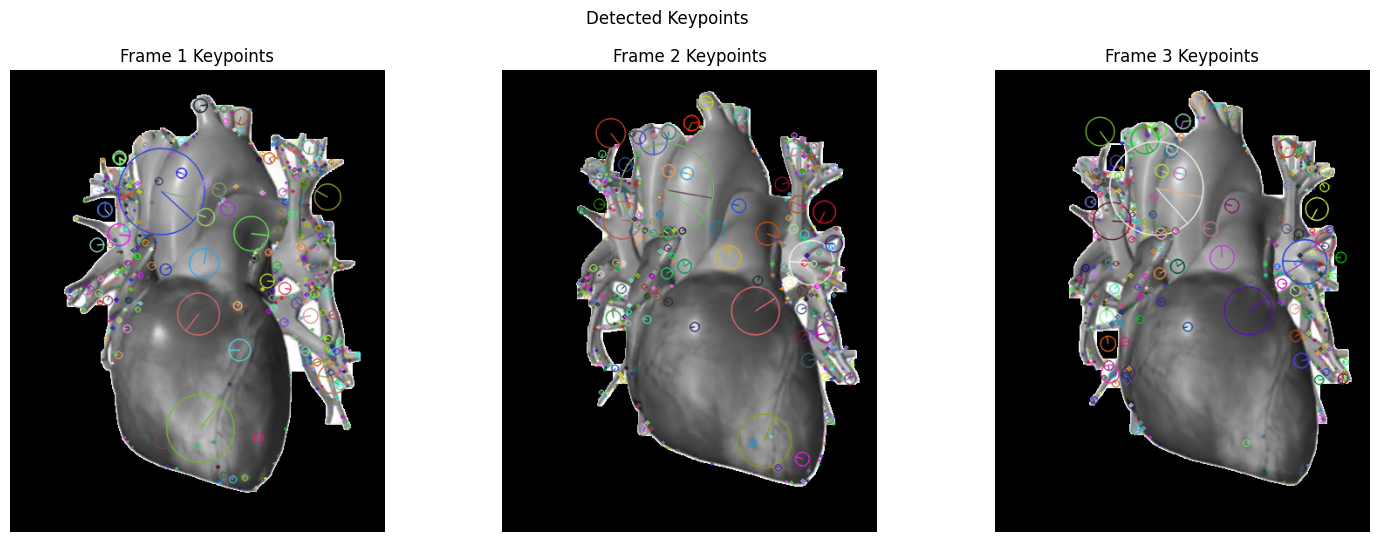

In [15]:
# Draw keypoints on the frames
keypoint_img1 = cv2.drawKeypoints(frame1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
keypoint_img2 = cv2.drawKeypoints(frame2, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
keypoint_img3 = cv2.drawKeypoints(frame3, kp3, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Function to convert BGR to RGB for plotting
def plot_image_bgr(img_bgr):
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide the axis

# Create a figure with subplots
plt.figure(figsize=(18, 6))
plt.suptitle('Detected Keypoints')

# Plot frame 1 with keypoints
plt.subplot(1, 3, 1)
plot_image_bgr(keypoint_img1)
plt.title('Frame 1 Keypoints')

# Plot frame 2 with keypoints
plt.subplot(1, 3, 2)
plot_image_bgr(keypoint_img2)
plt.title('Frame 2 Keypoints')

# Plot frame 3 with keypoints
plt.subplot(1, 3, 3)
plot_image_bgr(keypoint_img3)
plt.title('Frame 3 Keypoints')

plt.show()


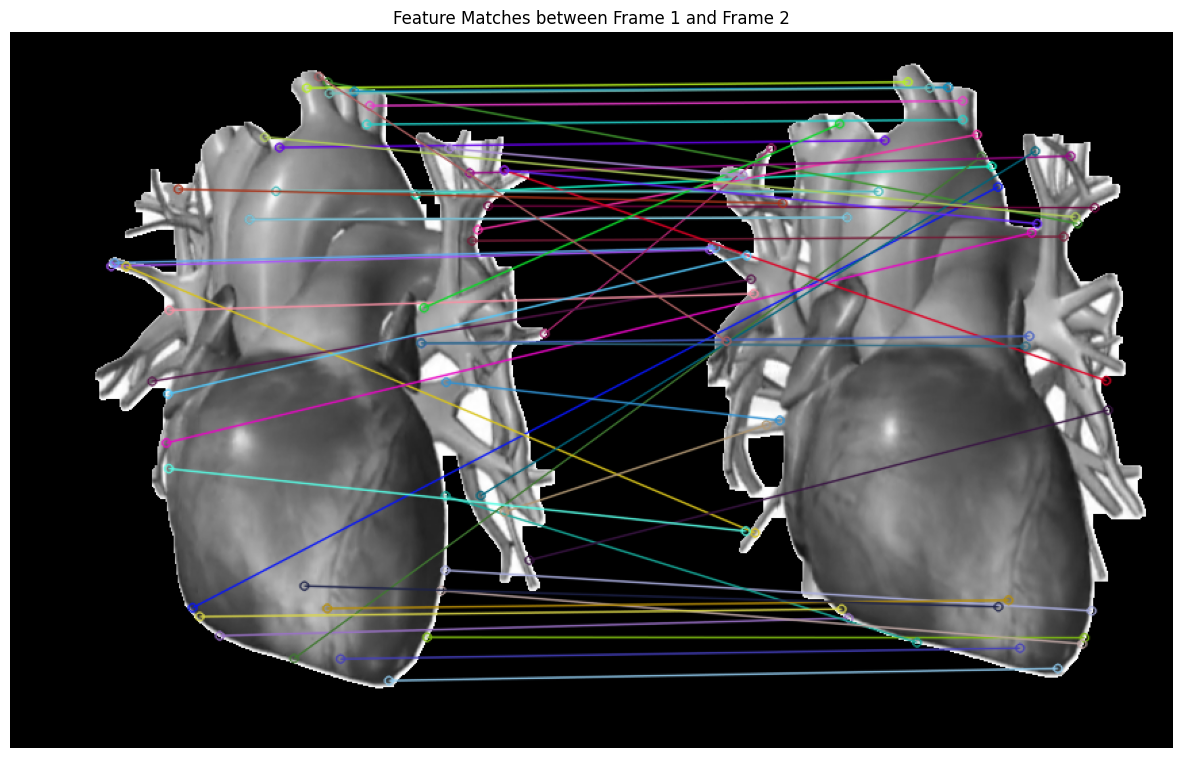

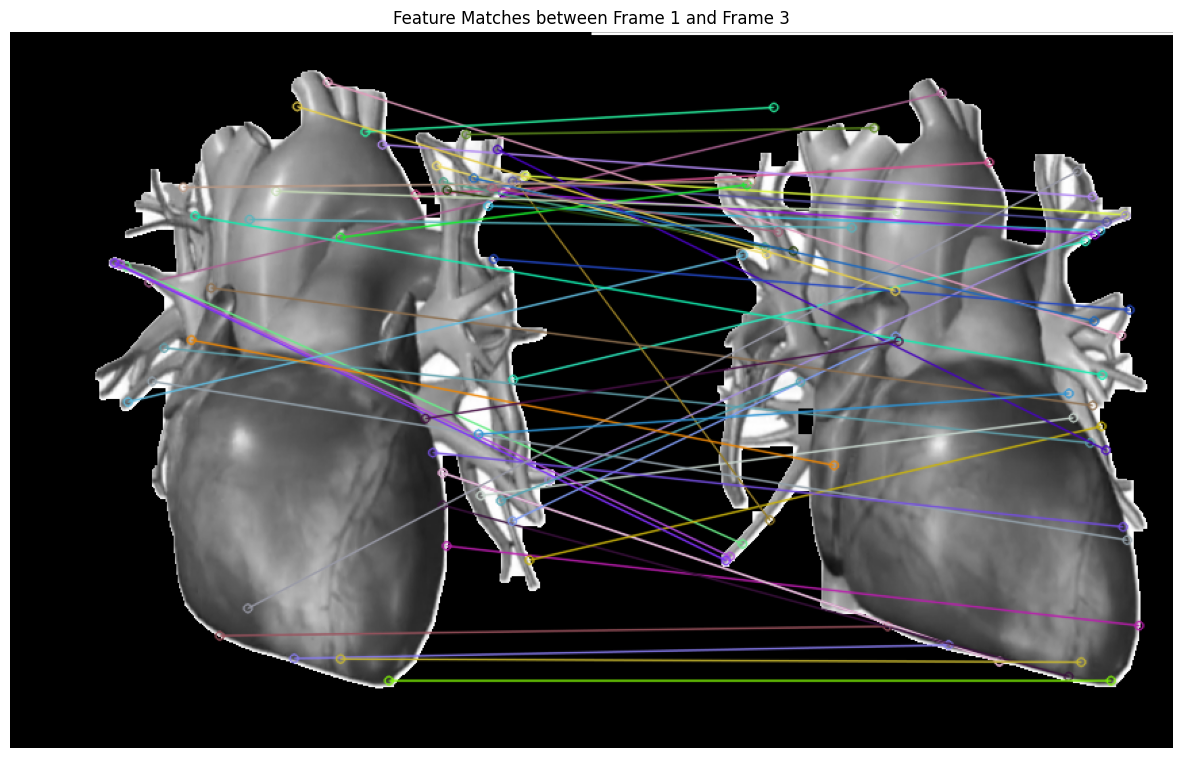

In [ ]:
import cv2

# Assume kp1, des1, kp2, des2, kp3, des3 are already computed using SIFT
# Initialize BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Find matches
matches12 = bf.match(des1, des2)
matches13 = bf.match(des1, des3)

# Sort them in the order of their distance (the lower the better)
matches12 = sorted(matches12, key=lambda x: x.distance)
matches13 = sorted(matches13, key=lambda x: x.distance)


import matplotlib.pyplot as plt

# Draw the first 50 matches.
img_matches12 = cv2.drawMatches(frame1, kp1, frame2, kp2, matches12[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches13 = cv2.drawMatches(frame1, kp1, frame3, kp3, matches13[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Plotting the matches with matplotlib
def plot_matches(img, title):
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_matches(img_matches12, 'Feature Matches between Frame 1 and Frame 2')
plot_matches(img_matches13, 'Feature Matches between Frame 1 and Frame 3')



### Verify Disparity Map

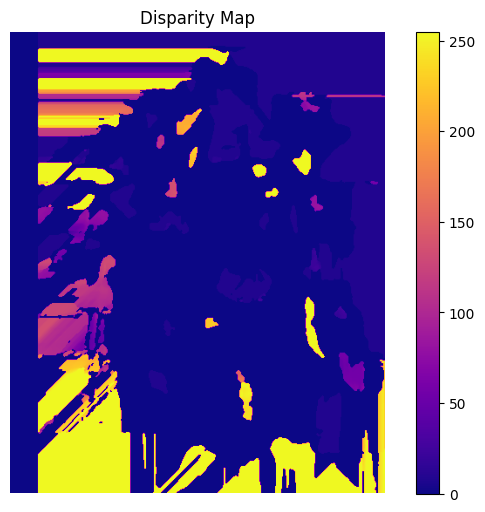

In [ ]:


# Convert images to grayscale

# Create StereoBM object
stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=32,  # Must be divisible by 16
    blockSize=15,
    P1=8 * 3 * 15 ** 2,  # Smoothness parameter
    P2=32 * 3 * 15 ** 2,  # Smoothness parameter
    disp12MaxDiff=1,
    uniquenessRatio=10,
    speckleWindowSize=100,
    speckleRange=32,
)

# Compute the disparity map
disparity_map = stereo.compute(frame1, frame2)

# Normalize the disparity map for visualization
normalized_disparity = cv2.normalize(disparity_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
normalized_disparity = np.uint8(normalized_disparity)

# Plot the disparity map
plt.figure(figsize=(8, 6))
plt.imshow(normalized_disparity, cmap='plasma')  # Or 'gray' depending on preference
plt.colorbar()  # Add color scale
plt.title('Disparity Map')
plt.axis('off')
plt.show()


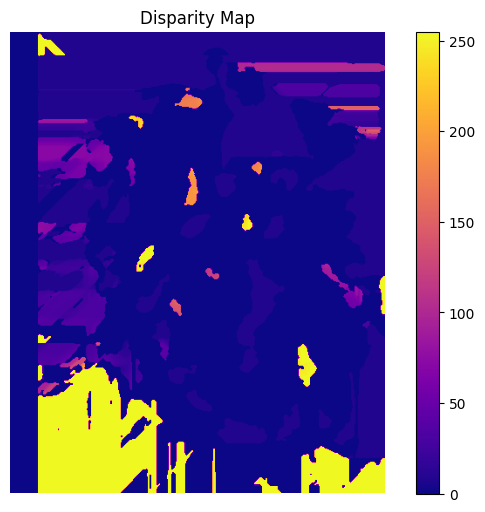

In [ ]:


# Create StereoBM object
stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=32,  # Must be divisible by 16
    blockSize=15,
    P1=8 * 3 * 15 ** 2,  # Smoothness parameter
    P2=32 * 3 * 15 ** 2,  # Smoothness parameter
    disp12MaxDiff=1,
    uniquenessRatio=10,
    speckleWindowSize=100,
    speckleRange=32,
)

# Compute the disparity map
disparity_map = stereo.compute(frame2, frame3)

# Normalize the disparity map for visualization
normalized_disparity = cv2.normalize(disparity_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
normalized_disparity = np.uint8(normalized_disparity)

# Plot the disparity map
plt.figure(figsize=(8, 6))
plt.imshow(normalized_disparity, cmap='plasma')  # Or 'gray' depending on preference
plt.colorbar()  # Add color scale
plt.title('Disparity Map')
plt.axis('off')
plt.show()

### Verify Feature Matching

### Verify Camera Calibration

### Check for Correct Masking

## Find the Essential and Fundamental Matrices

In [16]:


# Convert keypoints to an array of points
points1_12 = np.float32([kp1[m.queryIdx].pt for m in matches12])
points2_12 = np.float32([kp2[m.trainIdx].pt for m in matches12])

points1_13 = np.float32([kp1[m.queryIdx].pt for m in matches13])
points2_13 = np.float32([kp3[m.trainIdx].pt for m in matches13])

# Compute the fundamental matrix using RANSAC
F12, mask12 = cv2.findFundamentalMat(points1_12, points2_12, cv2.FM_RANSAC)
F13, mask13 = cv2.findFundamentalMat(points1_13, points2_13, cv2.FM_RANSAC)

# Select only inlier matches
inlier_matches12 = [matches12[i] for i in range(len(matches12)) if mask12[i]]
inlier_matches13 = [matches13[i] for i in range(len(matches13)) if mask13[i]]



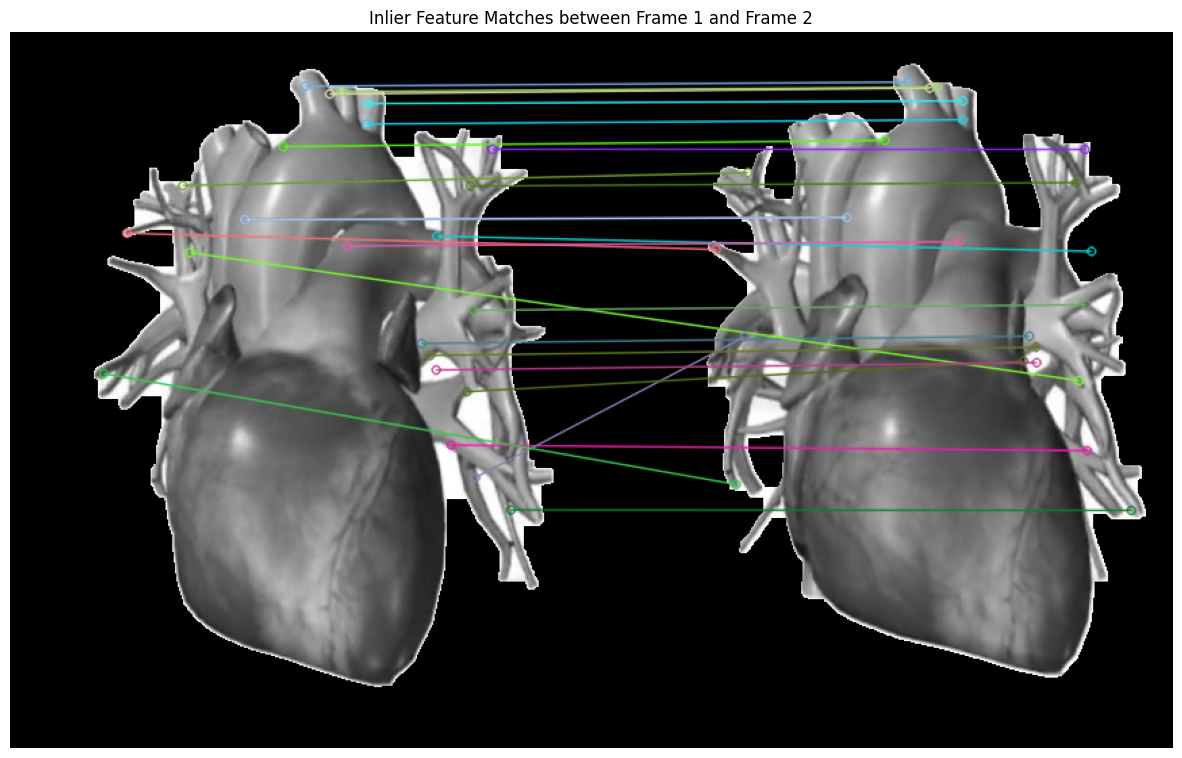

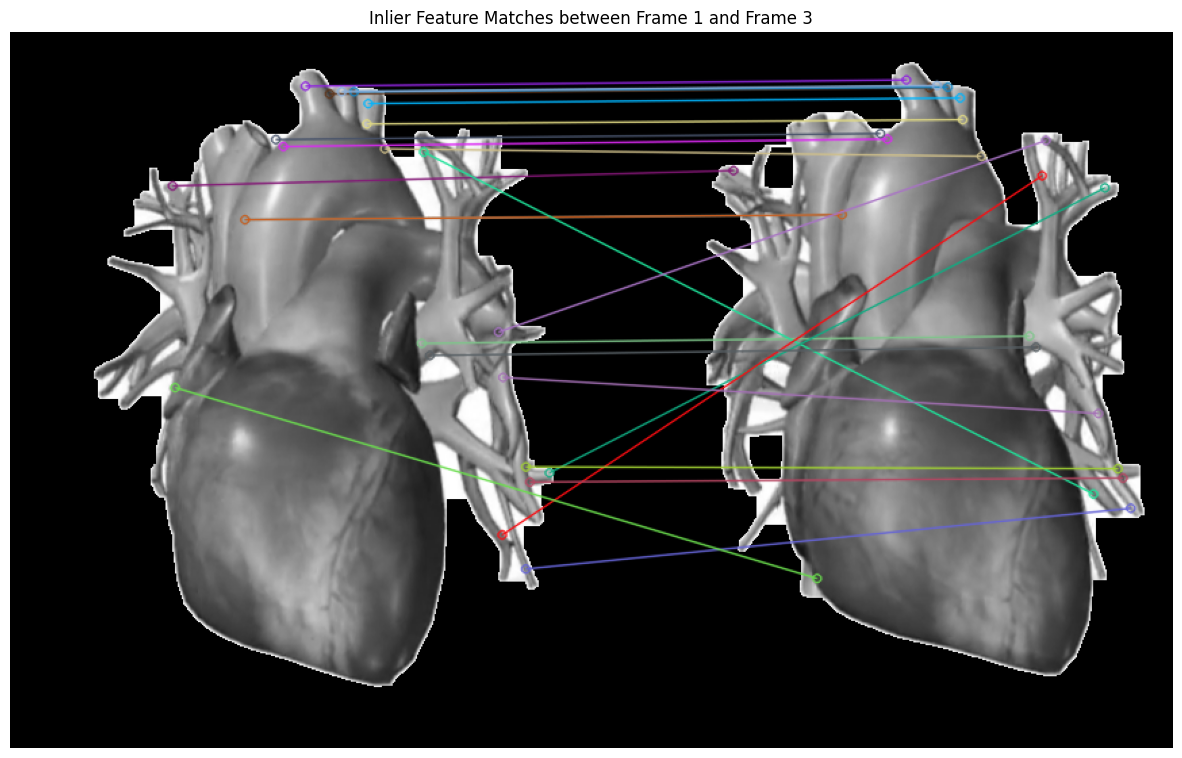

In [17]:
# Draw the inlier matches
img_inlier_matches12 = cv2.drawMatches(frame1, kp1, frame2, kp2, inlier_matches12, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_inlier_matches13 = cv2.drawMatches(frame1, kp1, frame3, kp3, inlier_matches13, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Plotting the inlier matches with matplotlib
def plot_inlier_matches(img, title):
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_inlier_matches(img_inlier_matches12, 'Inlier Feature Matches between Frame 1 and Frame 2')
plot_inlier_matches(img_inlier_matches13, 'Inlier Feature Matches between Frame 1 and Frame 3')



In [19]:
!pip install ipympl


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\esthe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(frame1, cmap='gray')
axs[1].imshow(frame2, cmap='gray')
axs[2].imshow(frame3, cmap='gray')

selected_points = {0: [], 1: [], 2: []}

def onclick(event):
    for i, ax in enumerate(axs):
        if event.inaxes == ax:
            x, y = int(event.xdata), int(event.ydata)
            selected_points[i].append((x, y))
            ax.plot(x, y, 'ro')
            fig.canvas.draw()

fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()


<IPython.core.display.Javascript object>

## Triangulate Points

In [ ]:
# Projection matrix for the first camera (assume it's at origin)
P1 = np.hstack((np.eye(3), np.zeros((3, 1))))

# Projection matrix for the second camera
P2 = np.hstack((R, t))

# Triangulate points
points_4d_homogeneous = cv2.triangulatePoints(P1, P2, pts1.T, pts2.T)

# Convert to non-homogeneous coordinates
points_3d = points_4d_homogeneous[:3, :] / points_4d_homogeneous[3, :]
points_3d = points_3d.T


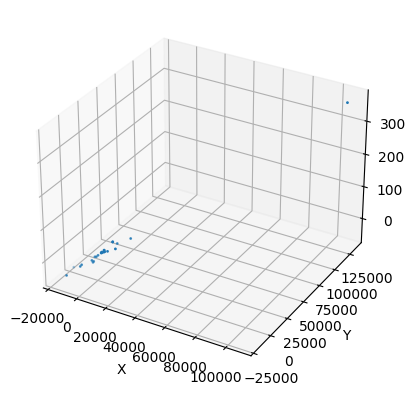

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], s=1)

# Label axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


# 3D Model Generation

## Creating Point Cloud

In [ ]:
# Ensure points_3d is a NumPy array with the correct shape
points_3d = np.array(points_3d.T)

print(points_3d.shape)

(3, 26)


In [ ]:
import open3d as o3d
import numpy as np

# Assuming points_3d is a 3xN numpy array
pcd = o3d.geometry.PointCloud()

# Ensure points_3d is of shape (N, 3) and the correct data type
points_3d = points_3d.astype(np.float64)

# Set the points in the point cloud
pcd.points = o3d.utility.Vector3dVector(points_3d.T)

# Estimate normals for the point cloud
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.05, max_nn=30))

# Apply Poisson surface reconstruction
mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=9)

# Visualize the mesh
o3d.visualization.draw_geometries([mesh])


# Rendering and Visualization

In [ ]:
print("Computing normal and rendering it.")
mesh.compute_vertex_normals()
print(np.asarray(mesh.triangle_normals))
o3d.visualization.draw_geometries([mesh])

Computing normal and rendering it.
[[-0.02699074 -0.04717077  0.99852212]
 [-0.00446956 -0.02467303  0.99968558]
 [-0.00874087 -0.04260272  0.99905386]
 ...
 [-0.01535455 -0.1070056   0.99413985]
 [-0.02971587 -0.10309852  0.99422717]
 [-0.02745414 -0.10533757  0.99405748]]
